## Non vectorized approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt

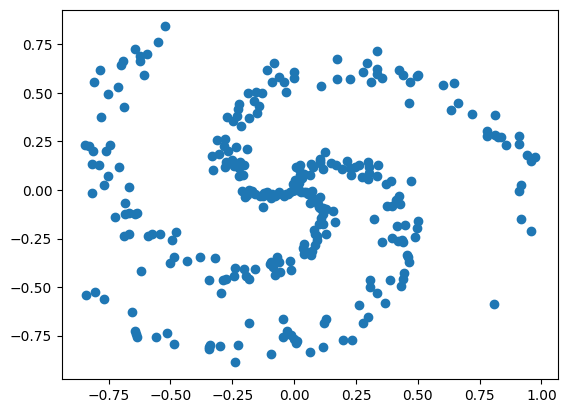

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
x = X[:, 0]
y = X[:, 1]

In [4]:
K = 3

In [5]:
k1 = np.random.randint(0,300)
k2 = np.random.randint(0,300)
k3 = np.random.randint(0,300)

In [6]:
print(k1, k2, k3)

285 183 276


In [7]:
n = 0
dd = {}
min_point = 0
for i, j in zip(x, y):
    
    given_point = np.array([i, j])
    
    p1 = np.array([x[k1], y[k1]])
    p2 = np.array([x[k2], y[k2]])
    p3 = np.array([x[k3], y[k3]])

    p1_dist = np.linalg.norm(p1-given_point)
    p2_dist = np.linalg.norm(p2-given_point)
    p3_dist = np.linalg.norm(p3-given_point)

    if p1_dist < p2_dist and p1_dist < p3_dist:
        min_point = p1
        dd[n] = 1
    elif p2_dist < p1_dist and p2_dist < p3_dist:
        min_point = p2
        dd[n] = 2
    else:
        min_point = p3
        dd[n] = 3
    n = n + 1
    

In [8]:
x_one, x_two, x_three = [], [], []
y_one, y_two, y_three = [], [], []

for key, value in dd.items():
    if value == 1:
        x_one.append(x[key])
        y_one.append(y[key])
    elif value == 2:
        x_two.append(x[key])
        y_two.append(y[key])
    else:
        x_three.append(x[key])
        y_three.append(y[key])


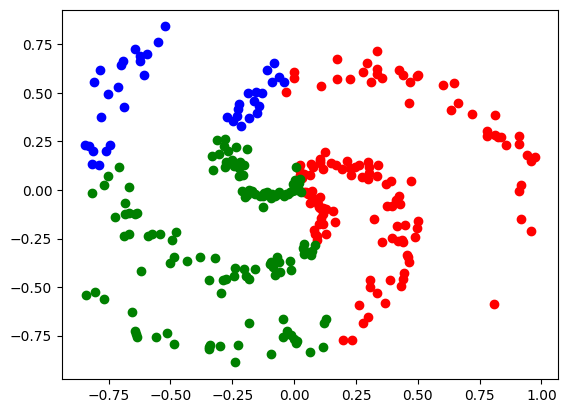

In [9]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_two, y_two, color='red')
plt.scatter(x_three, y_three, color='green')
plt.show()

In [10]:
len(x_one), len(x_two), len(x_three)

(40, 129, 131)

In [11]:
## update 1
x_one_centroid, y_one_centroid = np.mean(x_one), np.mean(y_one)
x_two_centroid, y_two_centroid = np.mean(x_two), np.mean(y_two)
x_three_centroid, y_three_centroid = np.mean(x_three), np.mean(y_three)

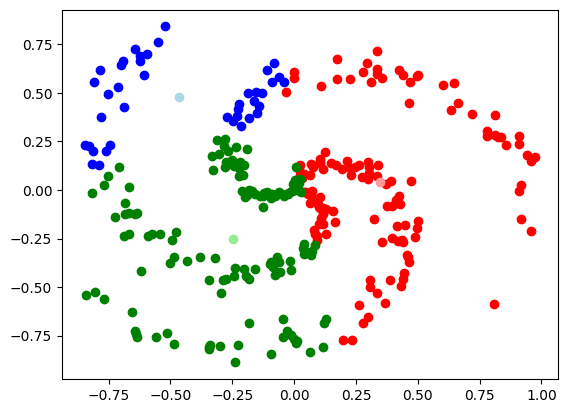

In [12]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_one_centroid, y_one_centroid, color='lightblue')

plt.scatter(x_two, y_two, color='red')
plt.scatter(x_two_centroid, y_two_centroid, color='#FF9999')

plt.scatter(x_three, y_three, color='green')
plt.scatter(x_three_centroid, y_three_centroid, color='lightgreen')

plt.show()

In [13]:
total_iterations = 0
while total_iterations < 20:

    n = 0
    min_point = 0
    dd = {}
    
    for i, j in zip(x, y):
        given_point = np.array([i, j])
        p1 = np.array([x_one_centroid, y_one_centroid])
        p2 = np.array([x_two_centroid, y_two_centroid])
        p3 = np.array([x_three_centroid, y_three_centroid])


        p1_dist = np.linalg.norm(p1-given_point)
        p2_dist = np.linalg.norm(p2-given_point)
        p3_dist = np.linalg.norm(p3-given_point)


        if p1_dist < p2_dist and p1_dist < p3_dist:
            min_point = p1
            dd[n] = 1
        elif p2_dist < p1_dist and p2_dist < p3_dist:
            min_point = p2
            dd[n] = 2
        else:
            min_point = p3
            dd[n] = 3
        n = n + 1

    x_one, x_two, x_three = [], [], []
    y_one, y_two, y_three = [], [], []

    for key, value in dd.items():
        if value == 1:
            x_one.append(x[key])
            y_one.append(y[key])
        elif value == 2:
            x_two.append(x[key])
            y_two.append(y[key])
        else:
            x_three.append(x[key])
            y_three.append(y[key])
            
    x_one_centroid, y_one_centroid = np.mean(x_one), np.mean(y_one)
    x_two_centroid, y_two_centroid = np.mean(x_two), np.mean(y_two)
    x_three_centroid, y_three_centroid = np.mean(x_three), np.mean(y_three)

    print(f"X_one length : {len(x_one)}, X_two length : {len(x_two)}, X_three length : {len(x_three)}")
    print(p1_dist, p2_dist, p3_dist)

    total_iterations = total_iterations + 1

X_one length : 57, X_two length : 130, X_three length : 113
0.3508920298444153 1.268933928205721 1.025491347118361
X_one length : 67, X_two length : 131, X_three length : 102
0.41753771687752916 1.2462060060796194 1.125657472807301
X_one length : 71, X_two length : 133, X_three length : 96
0.4562823837068392 1.23146444385121 1.1885469247557745
X_one length : 75, X_two length : 136, X_three length : 89
0.4607817391248121 1.2231155397939502 1.22046046421936
X_one length : 78, X_two length : 140, X_three length : 82
0.47826849616525846 1.2160987114187964 1.2500170393059906
X_one length : 79, X_two length : 142, X_three length : 79
0.4936971687372304 1.2086168550990357 1.2788875098121024
X_one length : 80, X_two length : 142, X_three length : 78
0.49905460995744205 1.2079837011874675 1.2869740162773553
X_one length : 81, X_two length : 142, X_three length : 77
0.5043544848021149 1.2100780846050685 1.288331876810913
X_one length : 81, X_two length : 142, X_three length : 77
0.50945107092608

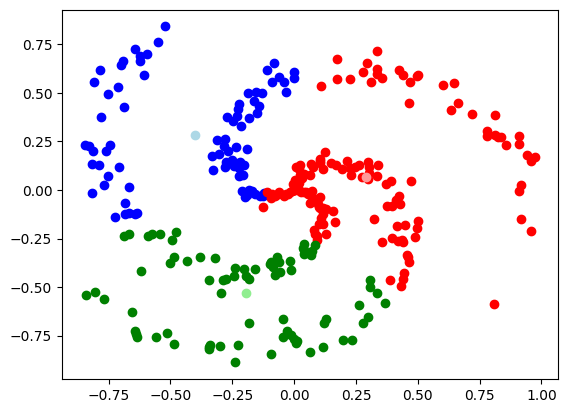

In [14]:
plt.scatter(x_one, y_one, color='blue')
plt.scatter(x_one_centroid, y_one_centroid, color='lightblue')

plt.scatter(x_two, y_two, color='red')
plt.scatter(x_two_centroid, y_two_centroid, color='#FF9999')

plt.scatter(x_three, y_three, color='green')
plt.scatter(x_three_centroid, y_three_centroid, color='lightgreen')

plt.show()

In [15]:
wcss = 0
for key, value in dd.items():
    if value == 1:
        wcss = wcss + (x_one_centroid - x[key])**2 + (y_one_centroid - y[key])**2
    elif value == 2:
        wcss = wcss + (x_two_centroid - x[key])**2 + (y_two_centroid - y[key])**2
    else:
        wcss = wcss + (x_three_centroid - x[key])**2 + (y_three_centroid - y[key])**2
print(wcss)

43.48468611915452


In [16]:
len(dd)

300

In [17]:
def clustering_quality_metrics():
    
    wcss = 0
    for key, value in dd.items():
        if value == 1:
            wcss = wcss + np.sqrt((x_one_centroid - x[key])**2 + (y_one_centroid - y[key])**2) 
        elif value == 2:
            wcss = wcss + np.sqrt((x_two_centroid - x[key])**2 + (y_two_centroid - y[key])**2)
        else:
            wcss = wcss + np.sqrt((x_three_centroid - x[key])**2 + (y_three_centroid - y[key])**2)

    
    avg_intra_clstr = wcss / len(dd)

    c_one = np.array([x_one_centroid, y_one_centroid])
    c_two = np.array([x_two_centroid, y_two_centroid])
    c_three = np.array([x_three_centroid, y_three_centroid])

    min_dist = min(np.linalg.norm(c_one - c_two), np.linalg.norm(c_one - c_three), np.linalg.norm(c_two - c_three))

    return avg_intra_clstr, min_dist

## Vectorized Approach

In [18]:
def kmeans_from_scratch(K):

    idx = np.random.choice(len(x), K, replace=False)
    
    cx = x[idx]
    cy = y[idx]
    
    for i in range(20):
    
        dists = np.sqrt((x[:, None] - cx[None, :])**2 +(y[:, None] - cy[None, :])**2)
    
        labels = np.argmin(dists, axis=1)
    
        #print(f'X_one length: {sum(labels == 0)}, X_two length: {sum(labels == 1)}, X_three: {sum(labels == 2)} ')
    
        new_cx = np.array([x[labels == k].mean() for k in range(K)])
        new_cy = np.array([y[labels == k].mean() for k in range(K)])
    
        if np.allclose(cx, new_cx) and np.allclose(cy, new_cy):
            break
    
        cx, cy = new_cx, new_cy

    wcss = np.sum((x - cx[labels])**2 + (y - cy[labels])**2)

    return cx, cy, labels, wcss

In [19]:
cx, cy, labels, wcss = kmeans_from_scratch(3)

In [20]:
def kmeans_best_of_n(n_init=10):

    lowest_wcss = np.inf
    
    for i in range(n_init):

        _, _, _, wcss = kmeans_from_scratch(K)
        if wcss < lowest_wcss:
            lowest_idx = i
            lowest_wcss = wcss

    return lowest_idx, lowest_wcss
    

In [21]:
kmeans_best_of_n(n_init=10)

(5, np.float64(43.48518587462634))

In [22]:
def clustering_quality_metrics():

    mean_intra = np.mean(np.sqrt((x - cx[labels])**2 + (y - cy[labels])**2))
    
    min_dist = np.inf
    for i in range(3):
        for j in range(3):
            if i != j:
                dist = np.linalg.norm(centroids[i] - centroids[j])
                if dist < min_dist:
                    min_dist = dist

    return mean_wcss, min_dist

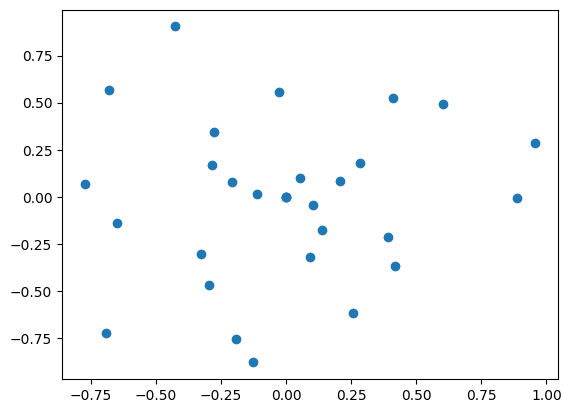

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 10 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [2]:
x = X[:, 0]
y = X[:, 1]

In [3]:
print(x.shape)
print(y.shape)

(30,)
(30,)


In [4]:
print(x)
print(y)

[ 0.          0.05289878  0.20570671  0.28218476  0.38983931  0.41893635
  0.25734199 -0.19390937 -0.12923135 -0.69123813 -0.         -0.11027756
 -0.20865326 -0.28638586 -0.2782345  -0.0274435   0.41183665  0.60226186
  0.88887874  0.957897    0.          0.10267051  0.13693271  0.09209763
 -0.32681783 -0.29788669 -0.65186829 -0.77494556 -0.68237942 -0.426562  ]
[ 0.          0.09771079  0.08406822  0.17743414 -0.21343892 -0.36487574
 -0.61499556 -0.75321805 -0.87944455 -0.72262705 -0.          0.01358454
  0.07646263  0.17057037  0.34657817  0.55487731  0.5242471   0.49215742
 -0.00424721  0.28711206  0.         -0.04247877 -0.17502042 -0.32035783
 -0.30119922 -0.46894083 -0.13968601  0.06631476  0.56963303  0.90445833]


In [5]:
points = np.column_stack((x, y))
points = np.unique(points, axis=0)

In [6]:
m = points.shape[0]

In [7]:
clusters = [{i} for i in range(m)]
merge_history = []
print(clusters)

[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}]


In [35]:
def single_link_distance(cluster_a, cluster_b, points):
    min_dist = np.inf
    for i in cluster_a:
        for j in cluster_b:
            dist = np.linalg.norm(points[i] - points[j])
            if dist < min_dist:
                min_dist = dist
    return min_dist

In [36]:
min_dist = np.inf
for i in range(len(clusters)):
    for j in range(i + 1, len(clusters)):
        dist = single_link_distance(clusters[i], clusters[j],points)

        if dist < min_dist:
            min_dist = dist
            new_i = i
            new_j = j

In [37]:
new_i ,new_j

(9, 24)

In [38]:
new_cluster = clusters[new_i] | clusters[new_j]

In [39]:
new_cluster

{9, 12, 14, 15, 17}

In [40]:
clusters.pop(max(new_i, new_j))
clusters.pop(min(new_i, new_j))

clusters.append(new_cluster)

In [41]:
merge_history.append({
    "merge": tuple(sorted(new_cluster)),
    "distance": float(min_dist)
})

In [42]:
merge_history

[{'merge': (12, 14), 'distance': 0.1111111111111111},
 {'merge': (12, 14, 15), 'distance': 0.1111111111111111},
 {'merge': (12, 14, 15, 17), 'distance': 0.1111111111111111},
 {'merge': (9, 12, 14, 15, 17), 'distance': 0.11675373065263382}]

In [43]:
print(clusters)

[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {10}, {11}, {13}, {16}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {17, 9, 12, 14, 15}]
